##### 1. Suppose you have three bills. Two are $10 bills and the other one is a $100 bill. Your friend puts each bill in a box. So one box has $100, and the other two boxes have $10 each. You pick a box, let's say box 1, then your friend who knows what's inside the boxes, opens another box, say box 3, which has a $10 bill. Do you want to stick your choice or switch to another box in order to get the $100 bill?  ( if the 100 is inside box 2 the friend must open box 3, but if the 100 is inside box 1 the friend can open either box 2 or 3.)

##### Produce the probability numbers and a graph to justify your choice to stick or switch. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# params for MC simulation
simulations = 10000
stick_count = 0
switch_count = 0

In [3]:
# this loop is what makes this a Monte Carlo simulation
# it runs the simulation a large number of times
# and keeps track of the number of times you stick or switch
for simulation in range(simulations):

    # your friend puts the bills ($10, $10, $100) into the three boxes
    boxes = [10, 10, 100]    # <-- these are the bills
    np.random.shuffle(boxes) # <-- this makes which bill is in which box unknown

    # randomly select a box as your first choice
    initial_choice = np.random.randint(3)

    # determine the box to be opened by your friend
    if boxes[initial_choice] == 100:

        # your friend can open either box 2 or box 3 randomly
        friend_open = np.random.choice([1, 2])
    else:

        # your friend must open box 3
        friend_open = 2

    # evaluate the choice to stick or switch
    if friend_open == 2:
        
        # switch
        final_choice = 3 - initial_choice
        switch_count += 1
    else:

        # stick
        final_choice = initial_choice
        stick_count += 1

In [4]:
# calc the probabilities
stick_prob = stick_count / simulations
switch_prob = switch_count / simulations

# results
print("Chances if you stick:", stick_prob)
print("Chances if you switch:", switch_prob)

Chances if you stick: 0.1679
Chances if you switch: 0.8321


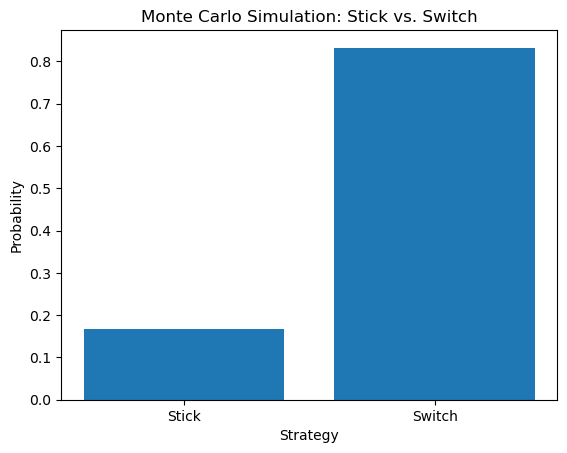

In [5]:
# vizualize the results
labels = ["Stick", "Switch"]
probabilities = [stick_prob, switch_prob]
plt.bar(labels, probabilities)
plt.xlabel("Strategy")
plt.ylabel("Probability")
plt.title("Monte Carlo Simulation: Stick vs. Switch")
plt.show()

Use the Monte Carlo simulation to find the integral:
∫[0,1] x⋅cos(71x) + sin(13x) dx

In [6]:
from scipy.integrate import quad

# ∫[0,1] x⋅cos(71x) + sin(13x) dx
def f(x):
    return x*np.cos(71*x) + np.sin(13*x)

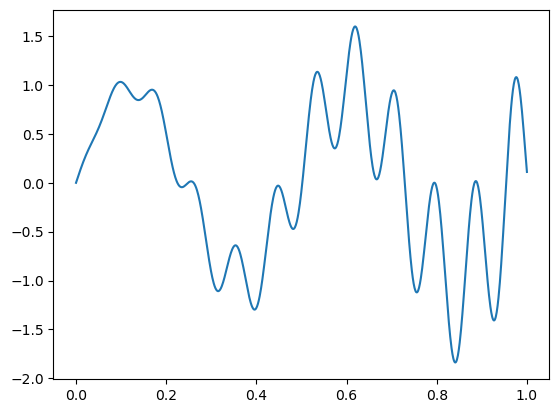

In [7]:
x = np.linspace(0, 1, 1000)
plt.plot(x, f(x))
pass

In [8]:
from sympy import sin, cos, symbols, integrate

# ∫[0,1] x⋅cos(71x) + sin(13x) dx
x = symbols('x')
true_value = integrate(x*cos(71*x) + sin(13*x), (x, 0, 1)).evalf(6)
print("True value:", true_value)

True value: 0.0202549


#### ∫[0,1] x⋅cos(71x) + sin(13x) dx with Monte Carlo Simulation
To find the integral with a Monte Carlo simulation, we need to run multiple trials. Each trial will consist of a random x value between 0 and 1. We will then plug that x value into the function and add it to the total. After all the trials are complete, we will divide the total by the number of trials and multiply it by the range of x values (1). This will give us the area under the curve.
(I think. I'm not sure if I'm doing this right.)

In [9]:
# we always need the random module for MC simulations
# or some other package that provides random number generation
import random

# params for MC simulation
simulations = 1000000
lower_limit = 0
upper_limit = 1
total_sum = 0
samples = []
integrals = []

In [10]:
# this loop is what makes this a Monte Carlo simulation
for simulation in range(simulations):

    # generate a random number between 0 and 1
    x = random.uniform(lower_limit, upper_limit)

    # evaluate the function at that rand number
    y = x*np.cos(71*x) + np.sin(13*x)

    # add the result to the total
    total_sum += y

    estimate = total_sum / (simulation + 1)

    # save the sample
    samples.append(y)

    # save the integral
    integrals.append(estimate)


In [11]:
# estimate the integral
# the more simulations that are run
# the better the estimate
integral = total_sum / simulations

# results
print("The more simulations that are run, the better the estimate - I think.")
print("True integral: ", true_value)
print("Integral estimate:", integral)

The more simulations that are run, the better the estimate - I think.
True integral:  0.0202549
Integral estimate: 0.019656985753616


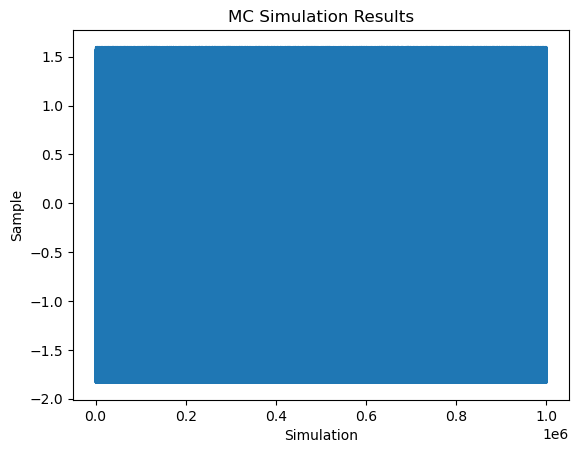

In [12]:
# vizualize the results
plt.plot(samples)
plt.xlabel("Simulation")
plt.ylabel("Sample")
plt.title("MC Simulation Results")
plt.show()